# 📊 Global Superstore Sales Analysis

Welcome to this data science project where we explore real-world sales data from a global retail company.

This dataset contains over 51,000 transactions across multiple countries, product categories, and time periods. Our goal is to uncover actionable business insights by analyzing patterns in sales, profit, discounts, shipping, and customer segments.

---

##  Objectives

- Understand the performance of different product categories, markets, and regions
- Identify products or segments with high sales but low or negative profit
- Analyze the impact of discounting and shipping costs on profitability
- Provide data-driven recommendations to improve business performance

---

##  Dataset Overview

The dataset contains information on:

-  Order dates, shipping dates, and years
-  Countries, regions, markets, and cities
-  Product categories and sub-categories
-  Sales, profit, discount, quantity, and shipping cost
-  Customer segments and order priority

---

Let’s dive into the data!

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [8]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Hp\Videos\projects\Global-Superstore-EDA1\data\superstore.csv", encoding='ISO-8859-1')  # adjust path if needed
print(df.shape)
print(df.columns)
df.head()

(51290, 27)
Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'è®°å½æ°', 'Order.Date', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode',
       'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [9]:
# Drop the non-English or corrupt column
df = df.drop(columns=['è®°å½æ°'])

# Convert date columns
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   Order.Date      51290 non-null  datetime64[ns]
 8   Order.ID        51290 non-null  object        
 9   Order.Priority  51290 non-null  object        
 10  Product.ID      51290 non-null  object        
 11  Product.Name    51290 non-null  object        
 12  Profit          51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Region          51290 non-null  object        
 15  Ro

In [11]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

#  Key Summary Stats & Correlation

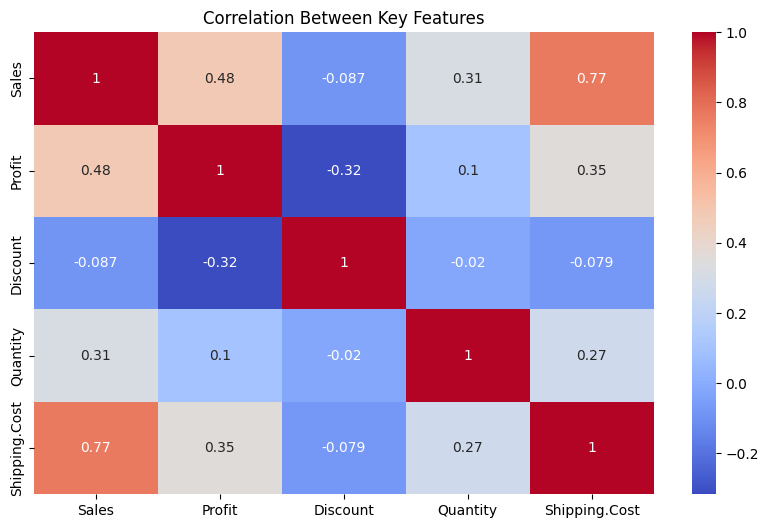

In [16]:
# Summary statistics
df.describe()

# Correlation heatmap of numerical feature
plt.figure(figsize= (10, 6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping.Cost']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Features")
plt.show()

#  Profit vs Sales — Overall

In [17]:
# total sales vs profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")

Total Sales: $12,642,905.00
Total Profit: $1,467,457.29


# Top 10 Countries by Sales & Profit

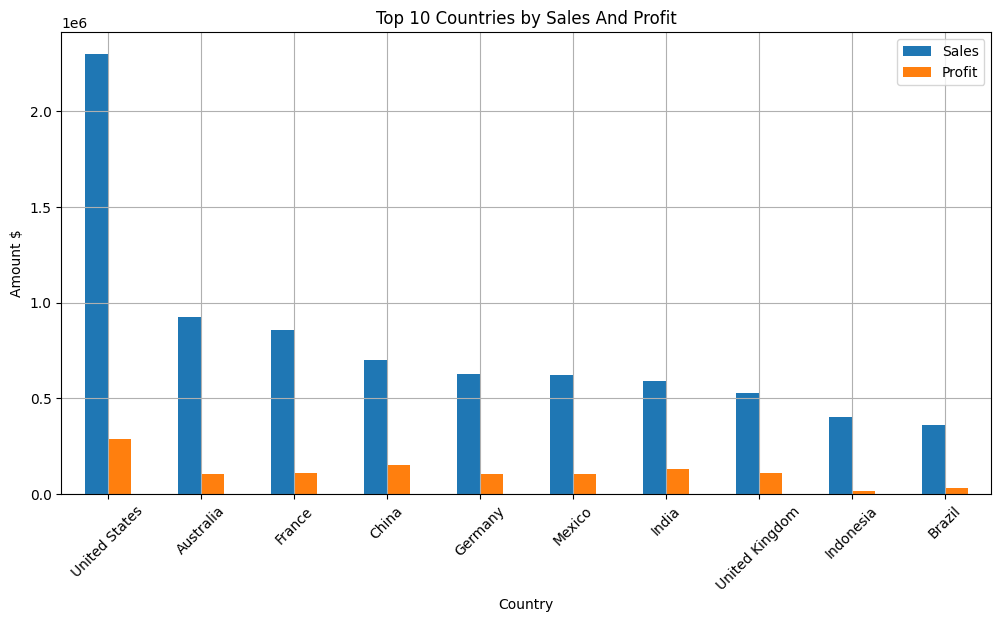

In [18]:
top_countries = df.groupby("Country")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).head(10)
top_countries.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Countries by Sales And Profit")
plt.ylabel("Amount $")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#  Category Analysis

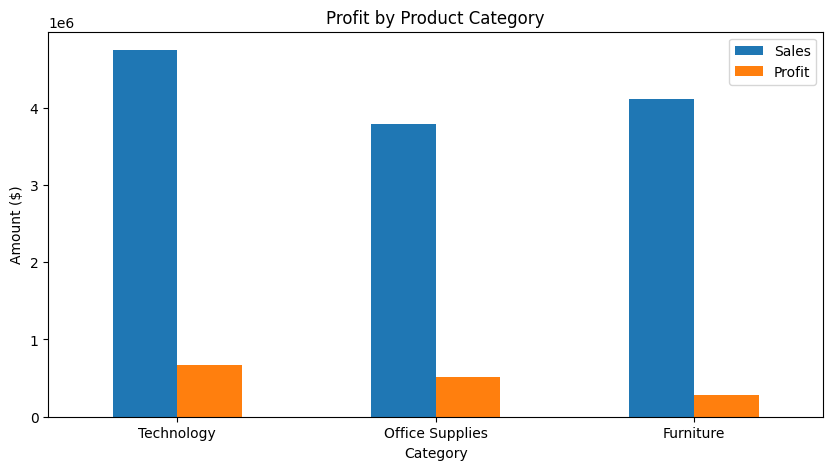

In [21]:
category_profit = df.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Profit",ascending= False)
category_profit.plot(kind='bar', figsize=(10,5), title="Profit by Product Category", legend=True)
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.show()

#  Sales and Profit Over Time (Monthly Trends)

Let’s group sales and profit by Year-Month to visualize performance over time:

In [ ]:
os.makedirs("../visuals", exist_ok=True)

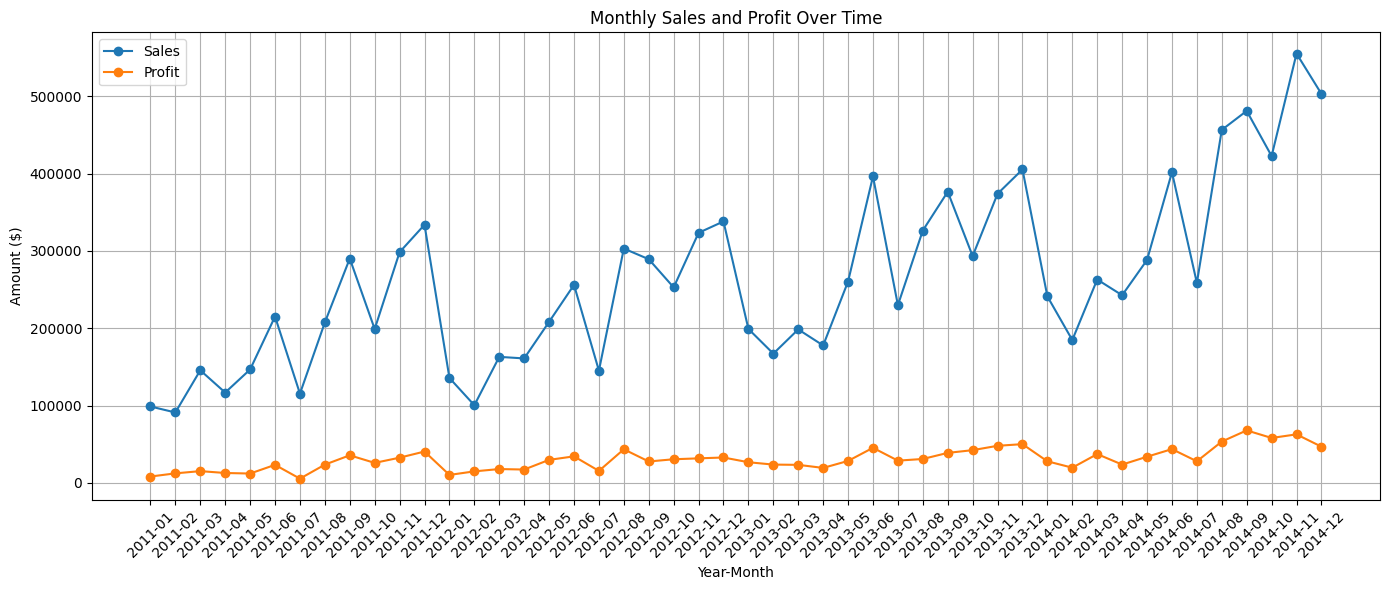

In [41]:
# Create a new column for year-month
df['YearMonth'] = df['Order.Date'].dt.to_period('M').astype(str)

# Group by YearMonth
monthly_trends = df.groupby('YearMonth')[['Sales', 'Profit']].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(monthly_trends['YearMonth'], monthly_trends['Sales'], label='Sales', marker='o')
plt.plot(monthly_trends['YearMonth'], monthly_trends['Profit'], label='Profit', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales and Profit Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("../visuals/monthly_sales_profit.png") 
plt.show()

#  Profit by Shipping Mode

Let’s see which shipping modes are most/least profitable.

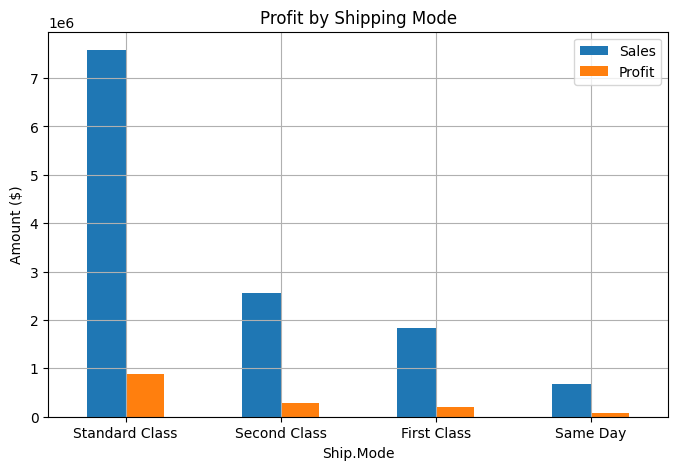

In [42]:
ship_profit = df.groupby('Ship.Mode')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

ship_profit.plot(kind='bar', figsize=(8,5), title='Profit by Shipping Mode')
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.grid(True)
plt.savefig("../visuals/profit_by_shipping_mode.png")
plt.show()

#  Discount Impact on Profit

Is discounting helping or hurting the business?

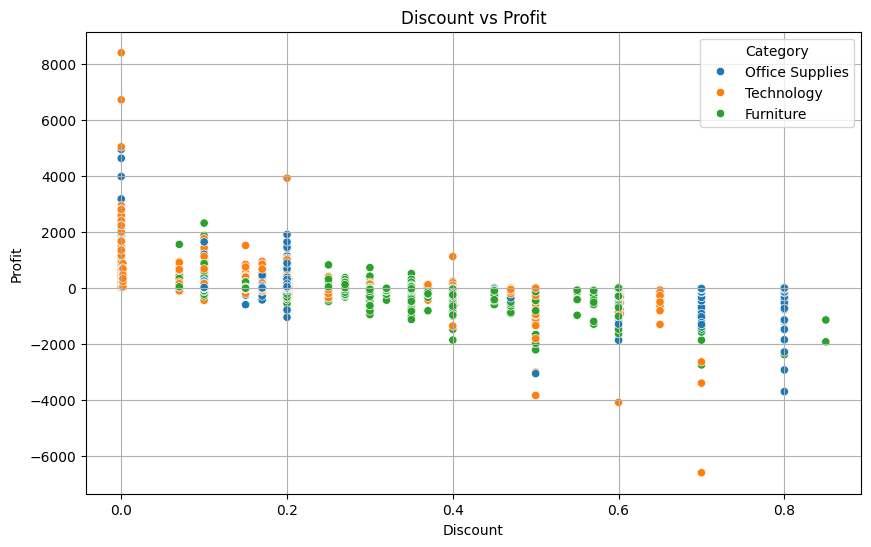

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.savefig("../visuals/discount_vs_profit.png")
plt.show()

# Loss-Making Products

Let’s find products with the highest negative profit.

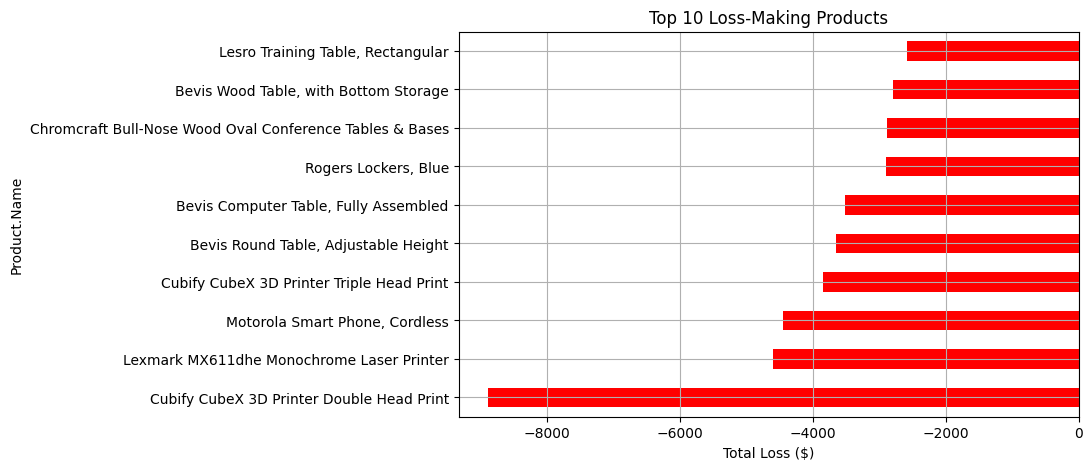

In [25]:
loss_products = df.groupby('Product.Name')['Profit'].sum().sort_values().head(10)

loss_products.plot(kind='barh', color='red', figsize=(8,5), title='Top 10 Loss-Making Products')
plt.xlabel('Total Loss ($)')
plt.grid(True)
plt.show()

# Final Insights & Recommendations

### 📊 Key Insights:

1. **Sales are rising over time**, but profits are inconsistent — showing potential issues in pricing, discounting, or logistics.
2. Several **products and sub-categories generate negative profits**, even with high sales volumes — possible overspending on discounts or shipping.
3. The **"Standard Class" shipping mode is widely used** and profitable, but some modes (e.g., "Same Day") have thinner margins.
4. **High discounts often lead to negative profits** — aggressive discounting isn’t always beneficial.
5. Certain countries drive high revenue, while others show **low sales and high shipping costs**, reducing profitability.

---

###  Business Recommendations:

-  **Re-evaluate discount policies**, especially on loss-making products — optimize for profitability, not just volume.
-  **Optimize shipping modes** by balancing cost and speed — e.g., push more “Standard Class” instead of expensive same-day options.
-  **Audit loss-making products** for cost structure or drop unprofitable SKUs.
-  Focus marketing efforts on **high-performing countries and segments**, and explore what works there.

---

### Project Highlights:

-  Dataset: 51K+ global transactions from the Global Superstore
-  Skills used: Data Cleaning, EDA, Visualization, Time Series, Business Strategy
-  Tools: Python, Pandas, Matplotlib, Seaborn